In [1]:
import matplotlib.pyplot as plt  # 导入 matplotlib包
from sympy import *

plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

## 人口模型
马尔萨斯和逻辑斯蒂模型的拟合

In [2]:
import pandas as pd
import numpy as np
from scipy import optimize

data = pd.read_excel("总人口.xls")
data1 = data[['年份', '年末总人口(万人)']].values
y = data['年末总人口(万人)'].values.astype(float)
x0 = y[0]


#Logistic
def f2(x, r, K):
    return K / (1 + (K / x0 - 1) * np.exp(-r * x))


#Malthus
def f(x, r):
    return x0 * np.exp(r * x)


x = np.arange(0, 30, 1)
x00 = np.arange(1990, 2020, 1)

[0.01245107]
[-1.75132441e-06  1.19190608e+00]


e:\anaconda\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in exp
  # Remove the CWD from sys.path while we load stuff.


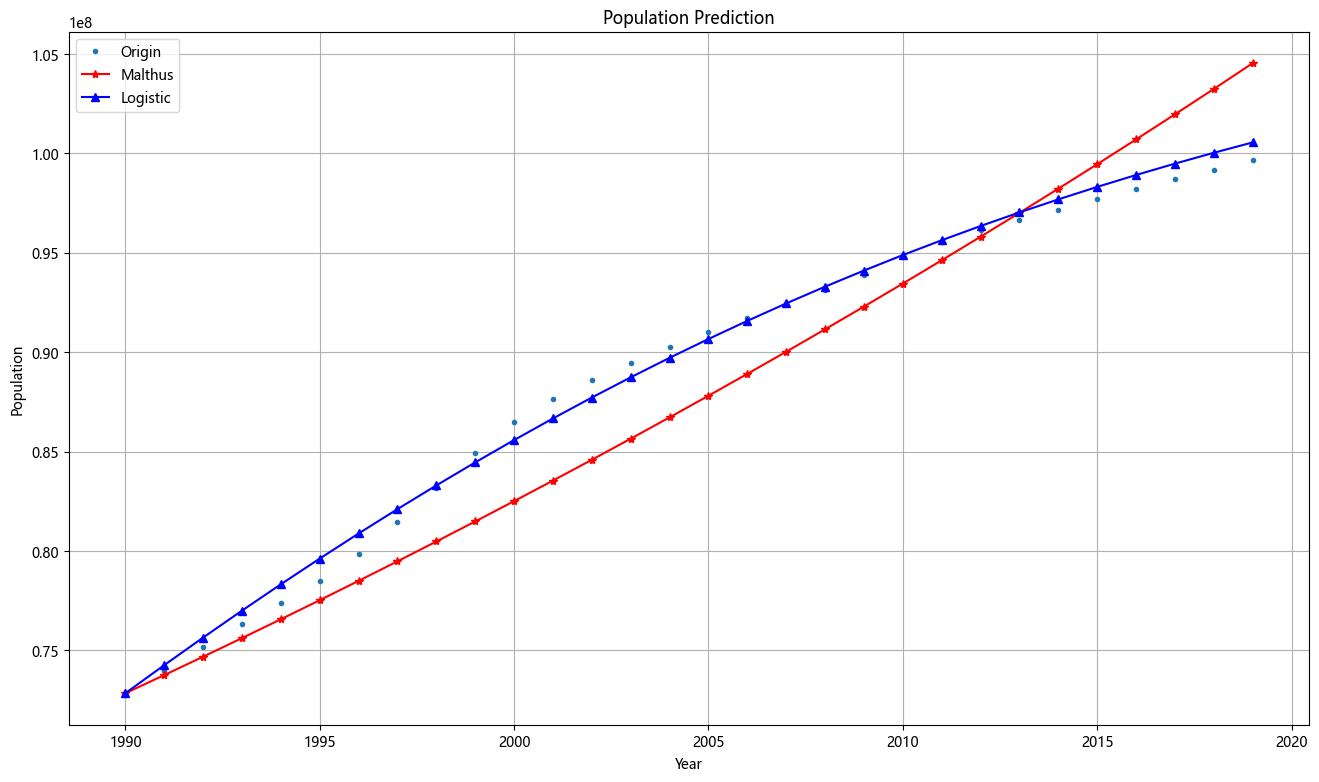

In [3]:
plt.figure(figsize=(16, 9))
plt.grid()
fita, fitb = optimize.curve_fit(f, x, y)
print(fita)
plt.plot(x00, 10000 * y, '.')
x1 = f(x, fita[0])
plt.plot(x00, 10000 * x1, 'r*-')
fita, fitb = optimize.curve_fit(f2, x, y)
print(fita)
x1 = f2(x, 0.0578, 11019)
plt.plot(x00, 10000 * x1, 'b^-')
plt.legend(["Origin", "Malthus", "Logistic"])
plt.xlabel("Year")
plt.ylabel("Population")
plt.title('Population Prediction')
plt.show()

## Leslie模型的拟合与预测

In [4]:
import pandas as pd
import numpy as np

a = pd.read_excel("data3.xlsx")
p = 0.48764
N00 = a['总人口(万人)']
N00 = np.array(N00)
A = np.eye(90)
b = a['生存率'][0:90]
b1 = b / 100
for i in range(90):
    A[i, :] *= b1[i]
c = a['调节后生育率'][0:90]
c1 = c / 1000
M = sum(c1)
d = np.zeros((91, 1))
B = np.vstack([c1, A])
L = np.hstack([B, d])
G = []
K = []
S1 = []
S2 = []
S3 = []
for i in range(1, 13):
    L0 = np.power(L, i)
    X = N00 @ L0
    G.append(X)
    Z = X / p
    K.append(sum(Z))
    S1.append(sum(Z[0:15]))
    S2.append(sum(Z[15:65]))
    S3.append(sum(Z[65:-1]))
K = np.array(K)
S1 = np.array(S1)
S2 = np.array(S2)
S3 = np.array(S3)


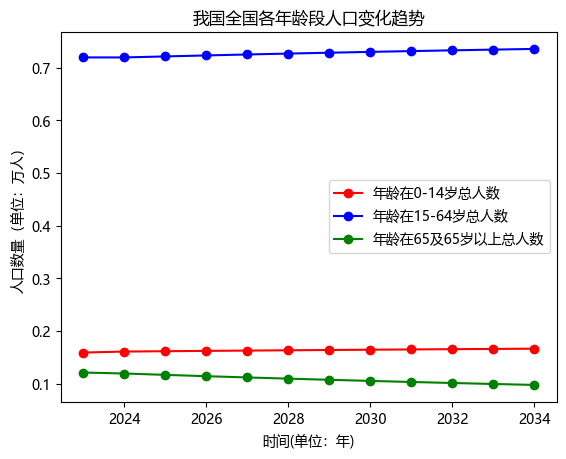

In [5]:
x = range(2023, 2035)
y1 = S1 / K
y2 = S2 / K
y3 = S3 / K
plt.figure(2)
plt.plot(x, y1, '-or')
plt.plot(x, y2, '-ob')
plt.plot(x, y3, '-og')
plt.title('我国全国各年龄段人口变化趋势')
plt.xlabel('时间(单位：年)')
plt.ylabel('人口数量（单位：万人）')
plt.legend(['年龄在0-14岁总人数', '年龄在15-64岁总人数', '年龄在65及65岁以上总人数'])
plt.show()

## 2022A国赛
第一问

10 s、20 s、40 s、60 s、100 s 时，振子位移：
-0.23457200651636445  -0.6610611607662957  0.2801575334800834  -0.34960572569028925  -0.09349261668968631
10 s、20 s、40 s、60 s、100 s 时，浮子位移：
-0.20587719598469595  -0.6111074607093779  0.2687678058226669  -0.3271641091699607  -0.08840822151441313
10 s、20 s、40 s、60 s、100 s 时，振子速度：
-0.6999366756292066  -0.2770209461894584  0.31252329323919115  -0.5255868152520028  -0.6500759826935697
10 s、20 s、40 s、60 s、100 s 时，浮子速度：
-0.6528210358747589  -0.2547834584124546  0.29530225272564836  -0.49151754966545735  -0.6098304429057226


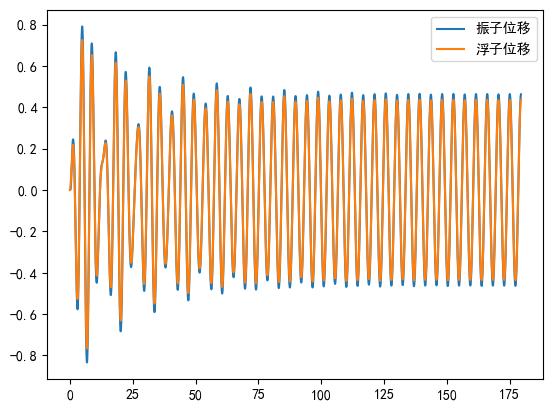

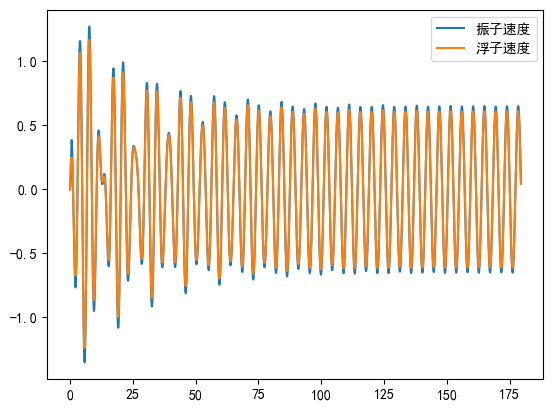

In [2]:
import numpy as np
from matplotlib import rcParams
from math import *
from scipy.integrate import odeint
import matplotlib.pyplot as plt


def pfun_1(ip, t):
    """第1小问微分方程模型"""
    x, y, z, w = ip
    return np.array([z,
                     w,
                     (-k * (x - y) - beta * (z - w)) / m2,
                     (k * (x - y) + beta * (z - w) + f * cos(omega * t) - gama * y - Ita * w) / (m1 + m_d)
                     ])


def pfun_2(ip, t):
    """第2小问微分方程模型"""
    x, y, z, w = ip
    return np.array([z,
                     w,
                     (-k * (x - y) - beta * sqrt(abs(z - w)) * (z - w)) / m2,
                     (k * (x - y) + beta * sqrt(abs(z - w)) * (z - w) + f * cos(omega * t) - gama * y - Ita * w) / (
                                 m1 + m_d)
                     ])


if __name__ == '__main__':
    dt = 0.01

    m1 = 4866  #浮子质量
    m2 = 2433  #振子质量
    m_d = 1335.535  #垂荡附加质量 (kg)
    k = 80000  #弹簧刚度 (N/m)
    beta = 10000  #平动阻尼系数
    f = 6250  #垂荡激励力振幅 (N)
    omega = 1.4005  #入射波浪频率 (s-1)
    T_max = (2 * pi / omega) * 40  #模拟最大时间
    gama = 1025 * 9.8 * pi  #静水恢复力系数
    Ita = 656.3616  #垂荡兴波阻尼系数 (N·s/m)

    t_lst = np.arange(0, T_max, dt)

    pfun = pfun_2  #选择计算第1小问还是第2小问

    sol = odeint(pfun, [0.0, 0.0, 0.0, 0.0], t_lst)
    rcParams['font.sans-serif'] = ['SimHei']
    plt.figure()
    plt.plot(t_lst, sol[:, 0], label='振子位移')
    plt.plot(t_lst, sol[:, 1], label='浮子位移')
    plt.legend()
    plt.figure()
    plt.plot(t_lst, sol[:, 2], label='振子速度')
    plt.plot(t_lst, sol[:, 3], label='浮子速度')
    plt.legend()

    print('10 s、20 s、40 s、60 s、100 s 时，振子位移：')
    print(sol[int(10 / dt), 0], '', sol[int(20 / dt), 0], '',
          sol[int(40 / dt), 0], '', sol[int(60 / dt), 0], '', sol[int(100 / dt), 0])
    print('10 s、20 s、40 s、60 s、100 s 时，浮子位移：')
    print(sol[int(10 / dt), 1], '', sol[int(20 / dt), 1], '',
          sol[int(40 / dt), 1], '', sol[int(60 / dt), 1], '', sol[int(100 / dt), 1])
    print('10 s、20 s、40 s、60 s、100 s 时，振子速度：')
    print(sol[int(10 / dt), 2], '', sol[int(20 / dt), 2], '',
          sol[int(40 / dt), 2], '', sol[int(60 / dt), 2], '', sol[int(100 / dt), 2])
    print('10 s、20 s、40 s、60 s、100 s 时，浮子速度：')
    print(sol[int(10 / dt), 3], '', sol[int(20 / dt), 3], '',
          sol[int(40 / dt), 3], '', sol[int(60 / dt), 3], '', sol[int(100 / dt), 3])

    plt.show()

  0%|          | 0/500 [00:00<?, ?it/s]

  0%|          | 1/500 [00:00<01:24,  5.92it/s]

solving...


100%|██████████| 500/500 [01:13<00:00,  6.76it/s]
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


情况1的最优阻尼系数： 36862
情况1的最大功率： 229.6924175828061


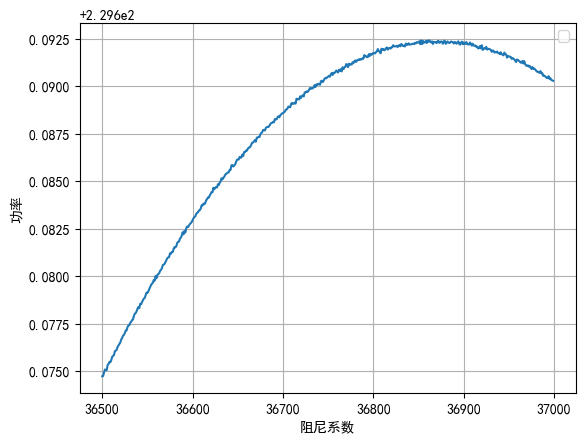

In [7]:

from matplotlib import rcParams
from math import *
import matplotlib.pyplot as plt


def power(sol, beta, alpha=1):
    """计算平均功率"""
    t2 = 250
    E = 0
    x = sol[:, 0]
    y = sol[:, 1]
    z = sol[:, 2]
    w = sol[:, 3]
    x_y = np.abs(x - y)
    d_xy = np.diff(x_y)
    d_xy = np.hstack((d_xy, d_xy[-1:]))
    xy_max = np.amax(x_y[int(t2 / dt):])
    P = pow(omega, alpha + 1) * beta * pow(xy_max, alpha + 1) * (2 / pi) * \
        quad(lambda x: pow(cos(x), alpha + 1), 0, pi / 2)[0]
    return (P)


def solve_1(beta1, beta2, step):
    ans_lst = []
    max_beta = 0;
    max_P = 0

    def pfun(ip, t):
        """第1小问微分方程模型"""
        x, y, z, w = ip
        return np.array([z,
                         w,
                         (-k * (x - y) - beta * (z - w)) / m2,
                         (k * (x - y) + beta * (z - w) + f * cos(omega * t) - gama * y - Ita * w) / (m1 + m_d)
                         ])

    t_lst = np.arange(0, T_max, dt)
    print('solving...')
    for beta in tqdm(range(beta1, beta2, step)):
        sol = odeint(pfun, [0.0, 0.0, 0.0, 0.0], t_lst)
        P = power(sol, beta)
        ans_lst.append(P)
        if P > max_P:
            max_beta = beta
            max_P = P
    plt.figure()
    plt.plot(np.arange(beta1, beta2, step), ans_lst)
    plt.xlabel('阻尼系数')
    plt.ylabel('功率')
    plt.legend()
    plt.grid()
    return max_beta, max_P


if __name__ == '__main__':
    dt = 0.01

    m1 = 4866  #浮子质量
    m2 = 2433  #振子质量
    m_d = 1165.992  #垂荡附加质量 (kg)
    k = 80000  #弹簧刚度 (N/m)
    f = 4890  #垂荡激励力振幅 (N)
    omega = 2.2143  #入射波浪频率 (s-1)
    T_max = 300  #模拟最大时间
    gama = 1025 * 9.8 * pi  #静水恢复力系数
    Ita = 167.8395  #垂荡兴波阻尼系数 (N·s/m)
    rcParams['font.sans-serif'] = ['SimHei']

    """多次缩小搜索范围步幅确定最优解"""
    max_beta, p = solve_1(36500, 37000, 1)
    print("情况1的最优阻尼系数：", max_beta)
    print("情况1的最大功率：", p)
    plt.show()

  0%|          | 0/100 [00:00<?, ?it/s]

阻尼系数：


  0%|          | 0/100 [00:00<?, ?it/s]

指数系数：


100%|██████████| 100/100 [00:48<00:00,  2.05it/s]


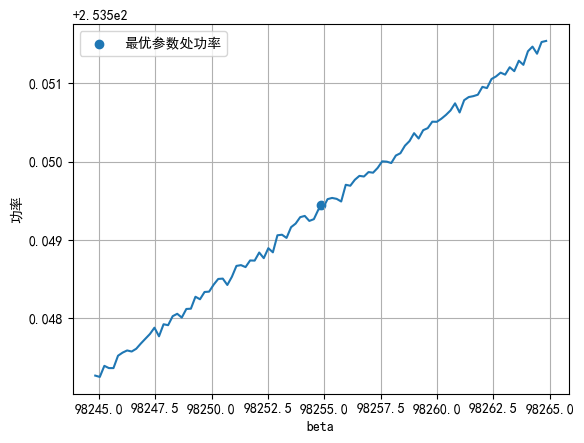

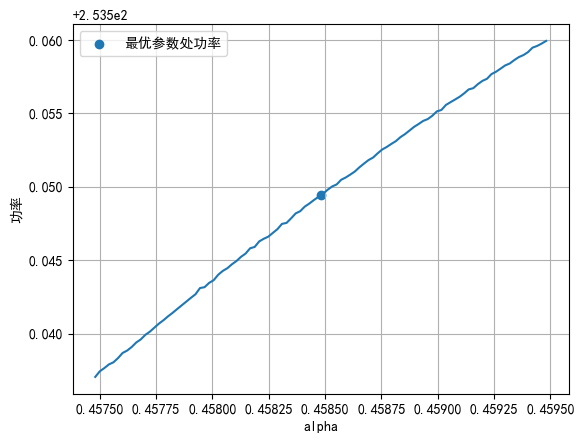

In [8]:

from matplotlib import rcParams
from math import *
from scipy.integrate import quad
import matplotlib.pyplot as plt
from tqdm import tqdm


def power(sol, beta, alpha=1):
    """计算平均功率"""
    t2 = 250  # t2时间后震动趋于稳定
    x = sol[:, 0]
    y = sol[:, 1]
    x_y = np.abs(x - y)
    d_xy = np.diff(x_y)
    d_xy = np.hstack((d_xy, d_xy[-1:]))
    xy_max = np.amax(x_y[int(t2 / dt):])
    P = pow(omega, alpha + 2) * beta * pow(xy_max, alpha + 2) * (2 / pi) * \
        quad(lambda x: pow(cos(x), alpha + 2), 0, pi / 2)[0]
    return (P)


def sens_beta(best_beta, best_alpha, beta_e=10):
    print("阻尼系数：")
    p_lst = []
    alpha = best_alpha;
    beta = 0

    def pfun(ip, t):
        """第2小问微分方程模型"""
        x, y, z, w = ip

        def sgn(a):
            if a > 0:
                return 1
            elif a < 0:
                return -1
            else:
                return 0

        return np.array([z,
                         w,
                         (-k * (x - y) - beta * pow(abs(z - w), alpha + 1) * sgn(z - w)) / m2,
                         (k * (x - y) + beta * pow(abs(z - w), alpha + 1) * sgn(z - w) + f * cos(
                             omega * t) - gama * y - Ita * w) / (m1 + m_d)
                         ])

    t_lst = np.arange(0, T_max, dt)
    for i in tqdm(np.linspace(best_beta - beta_e, best_beta + beta_e, 100)):
        beta = i
        sol = odeint(pfun, [0.0, 0.0, 0.0, 0.0], t_lst)
        P = power(sol, beta, alpha)
        p_lst.append(P)
    alpha, beta = best_alpha, best_beta
    sol = odeint(pfun, [0.0, 0.0, 0.0, 0.0], t_lst)
    P = power(sol, beta, alpha)
    plt.figure()
    plt.scatter(best_beta, P, label='最优参数处功率')
    plt.plot(np.linspace(best_beta - beta_e, best_beta + beta_e, 100), p_lst)
    plt.xlabel('beta')
    plt.ylabel('功率')
    plt.legend()
    plt.grid()


def sens_alpha(best_beta, best_alpha, alpha_e=0.001):
    print("指数系数：")
    p_lst = []
    alpha = 0;
    beta = best_beta

    def pfun(ip, t):
        """第2小问微分方程模型"""
        x, y, z, w = ip

        def sgn(a):
            if a > 0:
                return 1
            elif a < 0:
                return -1
            else:
                return 0

        return np.array([z,
                         w,
                         (-k * (x - y) - beta * pow(abs(z - w), alpha + 1) * sgn(z - w)) / m2,
                         (k * (x - y) + beta * pow(abs(z - w), alpha + 1) * sgn(z - w) + f * cos(
                             omega * t) - gama * y - Ita * w) / (m1 + m_d)
                         ])

    t_lst = np.arange(0, T_max, dt)
    for i in tqdm(np.linspace(best_alpha - alpha_e, best_alpha + alpha_e, 100)):
        alpha = i
        sol = odeint(pfun, [0.0, 0.0, 0.0, 0.0], t_lst)
        P = power(sol, beta, alpha)
        p_lst.append(P)
    alpha, beta = best_alpha, best_beta
    sol = odeint(pfun, [0.0, 0.0, 0.0, 0.0], t_lst)
    P = power(sol, beta, alpha)
    plt.figure()
    plt.scatter(best_alpha, P, label='最优参数处功率')
    plt.plot(np.linspace(best_alpha - alpha_e, best_alpha + alpha_e, 100), p_lst)
    plt.xlabel('alpha')
    plt.ylabel('功率')
    plt.legend()
    plt.grid()


if __name__ == '__main__':
    dt = 0.01

    m1 = 4866  #浮子质量
    m2 = 2433  #振子质量
    m_d = 1165.992  #垂荡附加质量 (kg)
    k = 80000  #弹簧刚度 (N/m)
    f = 4890  #垂荡激励力振幅 (N)
    omega = 2.2143  #入射波浪频率 (s-1)
    T_max = 300  #模拟最大时间
    gama = 1025 * 9.8 * pi  #静水恢复力系数
    Ita = 167.8395  #垂荡兴波阻尼系数 (N·s/m)
    rcParams['font.sans-serif'] = ['SimHei']

    sens_beta(98254.8371371, 0.458481)
    sens_alpha(98254.8371371, 0.458481)
    plt.show()

10 s、20 s、40 s、60 s、100 s 时，振子垂荡位移：
-0.5598047137582607  -0.7834047452168048  0.4277811699763324  -0.3483356757183278  -0.041847835225940516
10 s、20 s、40 s、60 s、100 s 时，浮子垂荡位移：
-0.4939070126972479  -0.7147297677138618  0.4019516734690775  -0.3262576917485249  -0.05028224161532102
10 s、20 s、40 s、60 s、100 s 时，振子垂荡速度：
0.9950500865742262  -0.2188049515604901  0.8767769472959417  -0.7875514307184733  -1.0779717076665976
10 s、20 s、40 s、60 s、100 s 时，浮子垂荡速度：
0.9287794488545107  -0.17755341030952604  0.7846377367004757  -0.7118737238483703  -0.9833716348328175
10 s、20 s、40 s、60 s、100 s 时，浮子纵摇角度：
-0.19351642178042627  0.18281688036300942  -0.1251008996436445  0.13246257489979232  0.015586310488483714
10 s、20 s、40 s、60 s、100 s 时，振子纵摇角度：
-0.20420860748292166  0.19387627609951513  -0.1311341962025825  0.14027162381328534  0.016661525807728686
10 s、20 s、40 s、60 s、100 s 时，浮子纵摇角速度：
-0.19081476179872386  -0.22955063289386782  -0.13992739593407083  0.009947050725566526  0.20225025023662413
10 s、20 s、40 

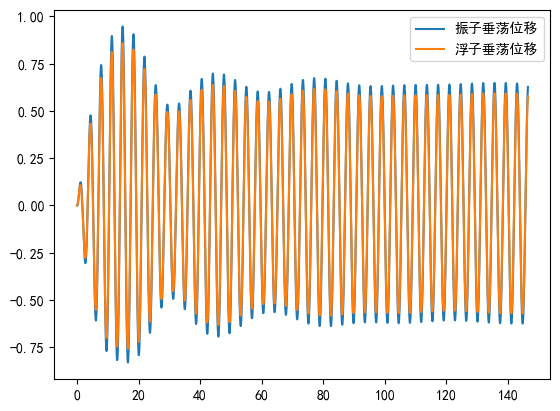

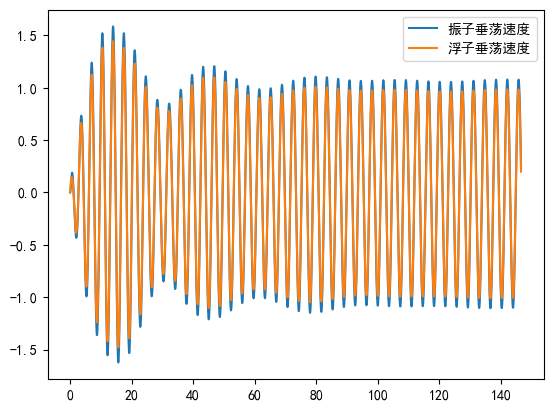

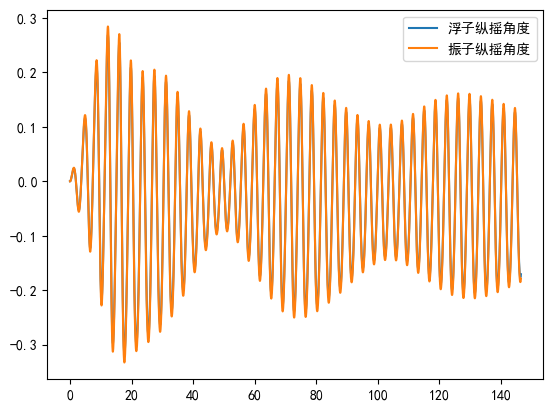

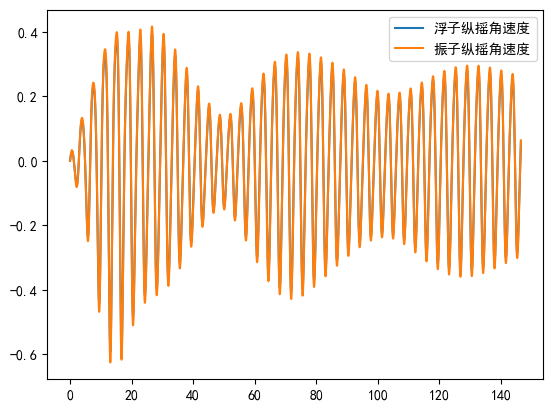

In [3]:
import numpy as np
from matplotlib import rcParams
from math import *
from scipy.integrate import odeint
import matplotlib.pyplot as plt


def pfun(ip, t):
    """第3问微分方程模型"""
    x, y, z, w, th1, th2, ph1, ph2 = ip
    A = np.array([[1, 0, 0, 0, 0, 0, 0, 0],
                  [0, 1, 0, 0, 0, 0, 0, 0],
                  [0, 0, m_v, m_v * cos(th2), 0, 0, 0, 0],
                  [0, 0, 0, m_f + m_d, 0, 0, 0, 0],
                  [0, 0, 0, 0, 1, 0, 0, 0],
                  [0, 0, 0, 0, 0, 1, 0, 0],
                  [0, 0, 0, 0, 0, 0, J_f + J_d, 0],
                  [0, 0, 0, -m_v * (l0 + x + 0.5 * h_v) * sin(th2), 0, 0, 0, J_v + m_v * (l0 + x + 0.5 * h_v) ** 2]])
    b = np.array([[z],
                  [w],
                  [m_v * g * (1 - cos(th2)) + m_v * (l0 + x + 0.5 * h_v) * ph2 ** 2 - k1 * x - beta_1 * z],
                  [m_v * g * (1 - cos(th2)) + (k1 * x + beta_1 * z) * cos(th2) + f * cos(
                      omega * t) - Ita_1 * w - gama_1 * y],
                  [ph1],
                  [ph2],
                  [k2 * (th2 - th1) + beta_2 * (ph2 - ph1) - Ita_2 * ph1 - (
                              ((2 + 15 * (2 - y) ** 2) / (8 + 30 * (2 - y))) * (
                                  (m_v + m_f) * g - 1025 * g * pi * y) + gama_2) * th1 + L * cos(omega * t)],
                  [m_v * g * (l0 + x + 0.5 * h_v) * sin(th2) - 2 * z * ph2 * m_v * (l0 + x + 0.5 * h_v) - k2 * (
                              th2 - th1) - beta_2 * (ph2 - ph1)]])
    Op = np.dot(np.linalg.inv(A), b)
    return Op.reshape((-1,))


if __name__ == '__main__':
    dt = 0.01
    g = 9.8

    l0 = 0.2019575  #弹簧初始长度
    m_f = 4866  #浮子质量
    m_v = 2433  #振子质量
    m_d = 1028.876  #垂荡附加质量 (kg)
    J_d = 7001.914  #纵摇附加转动惯量 (kg·m^2)
    J_v = 202.75  #振子绕质心转动惯量
    J_f = 16137.73119  #浮子转动惯量
    k1 = 80000  #弹簧刚度 (N/m)
    k2 = 250000  #扭转弹簧刚度 (N·m)
    beta_1 = 10000  #直线阻尼器阻尼系数
    beta_2 = 1000  #旋转阻尼器阻尼系数
    f = 3640  #垂荡激励力振幅 (N)
    L = 1690  #纵摇激励力矩振幅 (N·m)
    omega = 1.7152  #入射波浪频率 (s-1)
    T_max = (2 * pi / omega) * 40  #模拟最大时间
    gama_1 = 1025 * g * pi  #静水恢复力系数
    gama_2 = 8890.7  #静水恢复力矩系数 (N·m)
    Ita_1 = 683.4558  #垂荡兴波阻尼系数 (N·s/m)
    Ita_2 = 654.3383  #纵摇兴波阻尼系数 (N·m·s)
    h_v = 0.5  #振子高度

    t_lst = np.arange(0, T_max, dt)

    sol = odeint(pfun, [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], t_lst)

    """将振子相对铰链中心的径向位移、速度转换成垂荡位移、垂荡速度"""
    xx = np.zeros(sol.shape[0])
    vx = np.zeros(sol.shape[0])
    for idx in range(xx.shape[0]):
        xx[idx] = (l0 + sol[idx, 0]) * cos(sol[idx, 5]) - l0 + sol[idx, 1]
        vx[idx] = sol[idx, 2] * cos(sol[idx, 5]) + sol[idx, 3]

    rcParams['font.sans-serif'] = ['SimHei']
    plt.figure()
    plt.title('')
    plt.plot(t_lst, xx, label='振子垂荡位移')
    plt.plot(t_lst, sol[:, 1], label='浮子垂荡位移')
    plt.legend()

    plt.figure()
    plt.plot(t_lst, vx, label='振子垂荡速度')
    plt.plot(t_lst, sol[:, 3], label='浮子垂荡速度')
    plt.legend()

    plt.figure()
    plt.plot(t_lst, sol[:, 4], label='浮子纵摇角度')
    plt.plot(t_lst, sol[:, 5], label='振子纵摇角度')
    plt.legend()

    plt.figure()
    plt.plot(t_lst, sol[:, 6], label='浮子纵摇角速度')
    plt.plot(t_lst, sol[:, 7], label='振子纵摇角速度')
    plt.legend()

    print('10 s、20 s、40 s、60 s、100 s 时，振子垂荡位移：')
    print(xx[int(10 / dt)], '', xx[int(20 / dt)], '', xx[int(40 / dt)],
          '', xx[int(60 / dt)], '', xx[int(100 / dt)])
    print('10 s、20 s、40 s、60 s、100 s 时，浮子垂荡位移：')
    print(sol[int(10 / dt), 1], '', sol[int(20 / dt), 1], '', sol[int(40 / dt), 1],
          '', sol[int(60 / dt), 1], '', sol[int(100 / dt), 1])
    print('10 s、20 s、40 s、60 s、100 s 时，振子垂荡速度：')
    print(vx[int(10 / dt)], '', vx[int(20 / dt)], '', vx[int(40 / dt)],
          '', vx[int(60 / dt)], '', vx[int(100 / dt)])
    print('10 s、20 s、40 s、60 s、100 s 时，浮子垂荡速度：')
    print(sol[int(10 / dt), 3], '', sol[int(20 / dt), 3], '', sol[int(40 / dt), 3],
          '', sol[int(60 / dt), 3], '', sol[int(100 / dt), 3])
    print('10 s、20 s、40 s、60 s、100 s 时，浮子纵摇角度：')
    print(sol[int(10 / dt), 4], '', sol[int(20 / dt), 4], '', sol[int(40 / dt), 4],
          '', sol[int(60 / dt), 4], '', sol[int(100 / dt), 4])
    print('10 s、20 s、40 s、60 s、100 s 时，振子纵摇角度：')
    print(sol[int(10 / dt), 5], '', sol[int(20 / dt), 5], '', sol[int(40 / dt), 5],
          '', sol[int(60 / dt), 5], '', sol[int(100 / dt), 5])
    print('10 s、20 s、40 s、60 s、100 s 时，浮子纵摇角速度：')
    print(sol[int(10 / dt), 6], '', sol[int(20 / dt), 6], '', sol[int(40 / dt), 6],
          '', sol[int(60 / dt), 6], '', sol[int(100 / dt), 6])
    print('10 s、20 s、40 s、60 s、100 s 时，振子纵摇角速度：')
    print(sol[int(10 / dt), 7], '', sol[int(20 / dt), 7], '', sol[int(40 / dt), 7],
          '', sol[int(60 / dt), 7], '', sol[int(100 / dt), 7])

    plt.show()